<small><i>September 2014 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Source and license info are in the folder.</i></small>

In [1]:
#from IPython.core.display import HTML
#def css_styling():
#    styles = open("styles/custom.css", "r").read()
#    return HTML(styles)
#css_styling()

In [2]:
%matplotlib inline

#Binary operations: Mathematical morphology

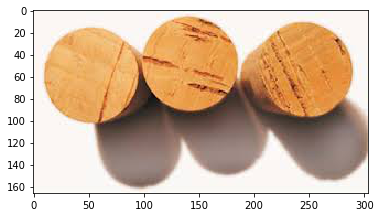

In [3]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

image = io.imread('./pim4bfiles/suros.jpg')/255.

plt.imshow(image)

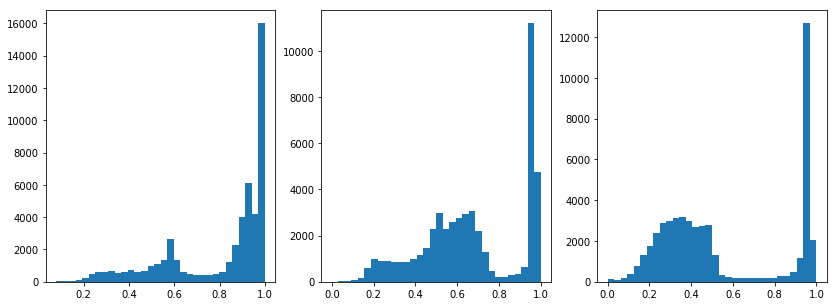

In [4]:
#Descomposem en canals
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

#compute histogram and plot
values,bins = np.histogram(r,bins=32)
center = (bins[:-1] + bins[1:]) / 2
wd = (bins[1]-bins[0])
plt.subplot(1,3,1)
plt.bar(center,values,align="center",width=wd)

#another way just for visualizing
plt.subplot(1,3,2)
plt.gca().hist(g.ravel(),bins=32)
plt.subplot(1,3,3)
plt.gca().hist(b.ravel(),bins=32)

plt.gcf().set_size_inches((14,5))

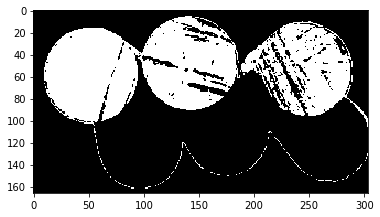

In [5]:
thr_r = 0.85 #>0.85
thr_g = 0.85 #<0.85
thr_b = 0.85 #<0.85

bw = np.logical_and(np.logical_and(r>thr_r, g<thr_g), b<thr_b)
plt.imshow(bw,cmap="gray")

In [6]:
from skimage import morphology

strel = morphology.disk(3)
print (strel)

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


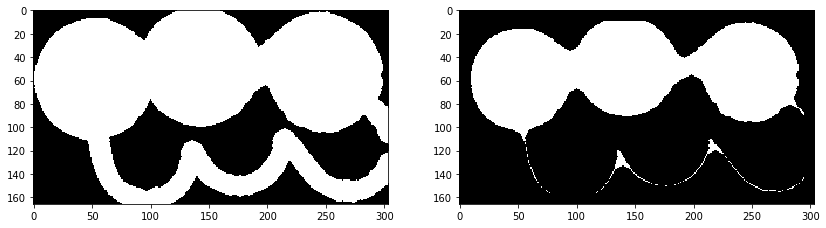

In [7]:
bw2 = morphology.binary_dilation(bw,strel)
bw2 = morphology.binary_dilation(bw2,strel)
bw2 = morphology.binary_dilation(bw2,strel)
bw3 = morphology.binary_erosion(bw2,strel)
bw3 = morphology.binary_erosion(bw3,strel)
bw3 = morphology.binary_erosion(bw3,strel)
plt.subplot(1,2,1)
plt.imshow(bw2,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(bw3,cmap="gray")
plt.gcf().set_size_inches((14,8))

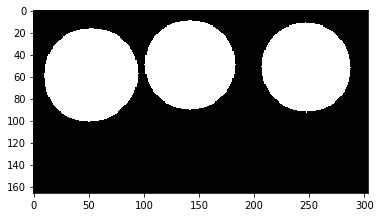

In [8]:
strel = morphology.disk(40)
bw4 = morphology.binary_erosion(bw3,strel)
bw4 = morphology.binary_dilation(bw4,strel)
plt.imshow(bw4,cmap="gray")

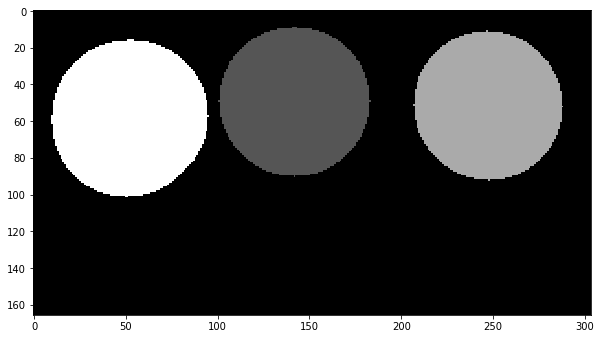

In [9]:
from skimage import measure
blobs_labels = measure.label(bw4)

plt.imshow(blobs_labels,cmap="gray")
plt.gcf().set_size_inches((10,7))

In [10]:
print ('Hi ha ' +str(np.max(blobs_labels))+' taps.')

Hi ha 3 taps.


In [11]:
from skimage import measure
regions = measure.regionprops(blobs_labels)

In [12]:
region=regions[1]

Regio 0: 5220 pixels
Regio 1: 5138 pixels
Regio 2: 5704 pixels


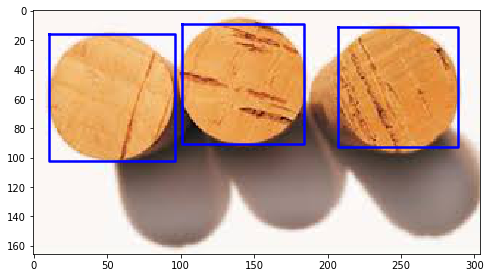

In [13]:
fig, ax = plt.subplots()
ax.imshow(image)
for i in range(len(regions)):
    minr, minc, maxr, maxc = regions[i].bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)
    print ('Regio '+str(i)+': '+str(regions[i].area)+' pixels')

fig.set_size_inches((8,6))

NO queremos fisuras con un area >40 pixels

3


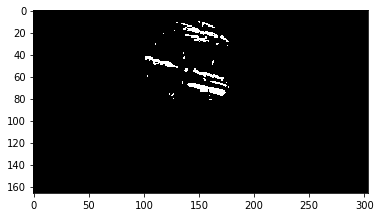

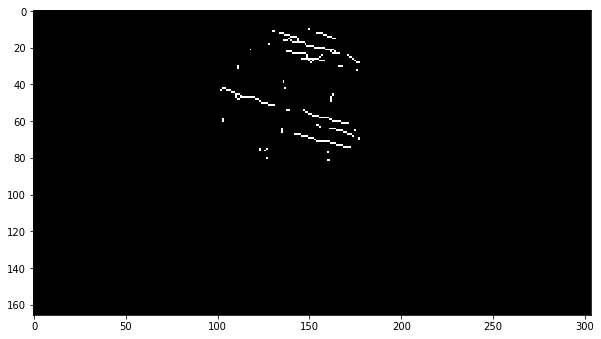

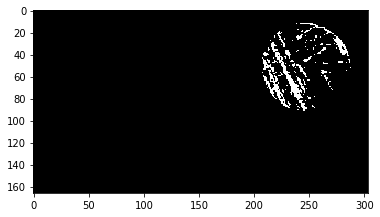

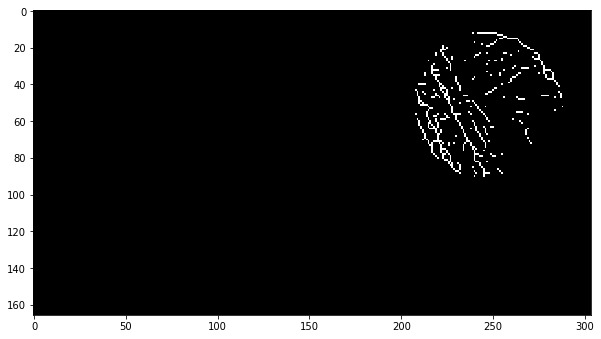

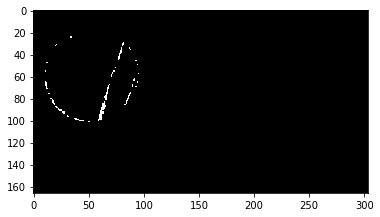

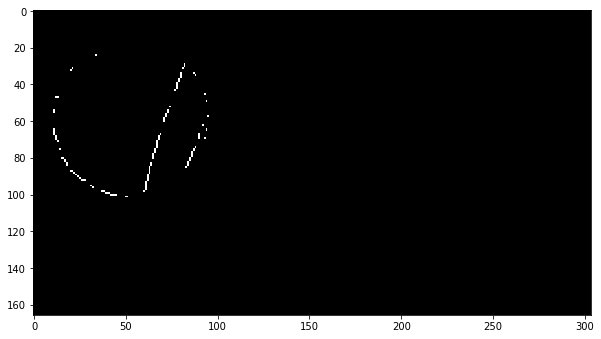

In [16]:
#Volem recuperar les fisures
print (np.max(blobs_labels))
for i in range(1,np.max(blobs_labels)+1):
    taps = np.where(blobs_labels==i,1.,0.)*(1.-bw)
    sk = morphology.skeletonize(taps)
    plt.figure()
    plt.imshow(taps,cmap="gray")
    plt.figure()
    plt.imshow(sk,cmap="gray")
    plt.gcf().set_size_inches((10,8))




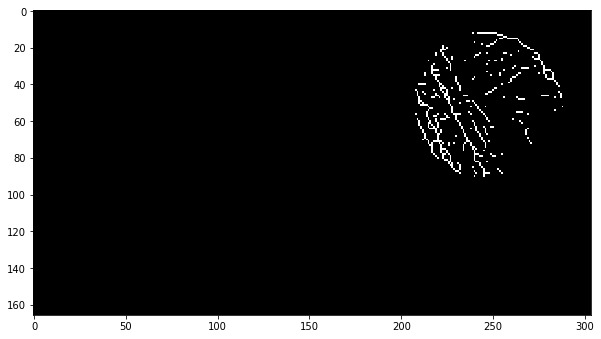

In [17]:
taps = np.where(blobs_labels==2,1.,0.)*(1.-bw)
sk = morphology.skeletonize(taps)
plt.figure()
plt.imshow(sk,cmap="gray")
plt.gcf().set_size_inches((10,8))

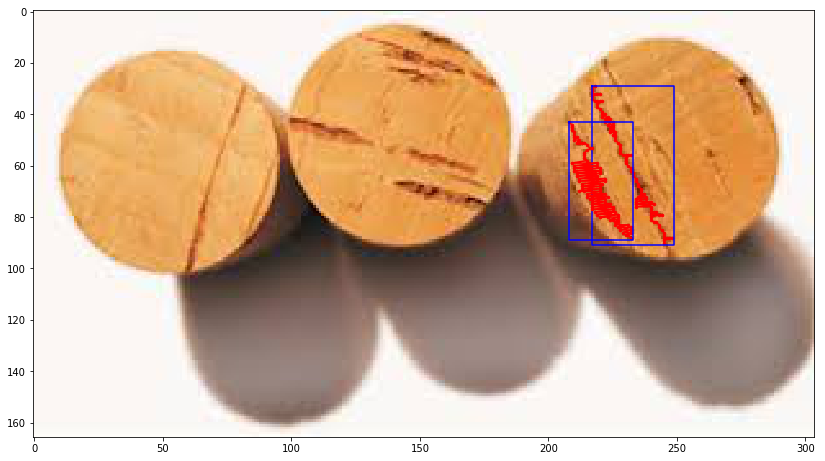

In [18]:
from skimage import measure
blobs = measure.label(sk)

fig,ax = plt.subplots()
ax.imshow(image)

from skimage import measure
regions = measure.regionprops(blobs)

from skimage import draw

for item in regions:
    if item.area>40:
        minr, minc, maxr, maxc = item.bbox
        bx = (minc, maxc, maxc, minc, minc)
        by = (minr, minr, maxr, maxr, minr)
        ax.plot(item.coords[:,1],item.coords[:,0],'r',marker='.',markersize=5)
        ax.plot(bx, by, '-b', linewidth=1.5)
fig.set_size_inches((14,8))

#Conditioned dilation